# Занятие 1. Мультипоточность. Часть 1

**Поток** — наименьшая единица выполнения внутри программы, находится внутри процесса и может выполняться параллельно с другими потоками.  
_Это как класс внутри другого класса, но в отличие от классов, потоки могут выполняться одновременно._

> ⚠️ **Внимание:** Ошибки возникают, если потоки пытаются одновременно изменить одни и те же данные.

**Многопоточность (Concurrency)** — способность программы выполнять несколько потоков одновременно, что позволяет более эффективно использовать ресурсы процессора и ускорять выполнение задач.

**Параллелизм (Parallelism)** — способность программы выполнять несколько потоков одновременно на разных ядрах процессора, что позволяет значительно ускорить выполнение задач.

> После параллелизма можно использовать многопоточность, чтобы управлять потоками и синхронизировать их выполнение.

### Объект Thread из `threding`:
- Применяется, когда идут запросы к API или нужно выполнять задачи, не требующие интенсивных вычислений (например, работа с сетью или ввод/вывод).
- `Thread` — класс, представляющий поток выполнения в Python.

**Параметры конструктора:**
- `target` - функция, которая будет выполняться в новом потоке.
- `args` - кортеж аргументов, которые будут переданы функции `target`.
- `kwargs` - словарь аргументов, которые будут переданы функции `target`.
- `name` - имя потока, которое можно использовать для идентификации потока.
- `daemon` - если `True`, то поток будет работать в фоновом режиме и завершится при завершении основного потока. По умолчанию `False`.
- `group` - группа потоков, к которой будет принадлежать новый поток. По умолчанию `None`.


### Теперь изолирование процессов `Multiprocessing`

- Применяется для задач, требующих интенсивных вычислений (например, обработка больших данных или сложные математические операции).
- Используется модуль `multiprocessing`, позволяющий создавать и управлять процессами.
- Класс `Process` представляет процесс выполнения в Python.


## Методы и атрибуты класса Thread

| Метод / Атрибут   | Описание                                                                                  |
|-------------------|------------------------------------------------------------------------------------------|
| `start()`         | Запускает поток, вызывая функцию `target` с аргументами `args` и `kwargs`                |
| `join(timeout)`   | Блокирует основной поток до завершения потока или истечения времени ожидания              |
| `is_alive()`      | Возвращает `True`, если поток выполняется, иначе `False`                                 |
| `getName()`       | Возвращает имя потока                                                                    |
| `setName(name)`   | Устанавливает имя потока                                                                 |
| `ident`           | Уникальный идентификатор потока                                                          |
| `daemon`          | `True`, если поток фоновый, иначе `False`                                                |
| `name`            | Имя потока                                                                               |
| `native_id`       | Идентификатор потока в ОС                                                                |
| `group`           | Группа потоков, к которой принадлежит поток                                              |
| `args`            | Кортеж аргументов, переданных функции `target`                                           |
| `kwargs`          | Словарь аргументов, переданных функции `target`                                          |

---

## Методы и атрибуты класса Process

| Метод / Атрибут   | Описание                                                                                  |
|-------------------|------------------------------------------------------------------------------------------|
| `start()`         | Запускает процесс, вызывая функцию `target` с аргументами `args` и `kwargs`              |
| `join(timeout)`   | Блокирует основной поток до завершения процесса или истечения времени ожидания            |
| `terminate()`     | Завершает процесс                                                                        |
| `is_alive()`      | Возвращает `True`, если процесс выполняется, иначе `False`                               |
| `exitcode`        | Код завершения процесса                                                                  |
| `pid`             | Уникальный идентификатор процесса                                                        |
| `name`            | Имя процесса                                                                             |
| `daemon`          | `True`, если процесс фоновый, иначе `False`                                              |
| `authkey`         | Ключ аутентификации процесса                                                             |
| `context`         | Контекст процесса (информация о процессе и окружении)                                    |


### Можно совмещать Thread и Process:
```Python
from multiprocessing import Process
from threading import Thread

def thread_task(data):
    # какая-то работа в потоке
    print(f"Поток: {data}")

def process_task(file):
    threads = []
    for i in range(3):
        t = Thread(target=thread_task, args=(f"{file} - part {i}",))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()

if __name__ == "__main__":
    files = ["file1", "file2"]
    processes = []
    for f in files:
        p = Process(target=process_task, args=(f,))
        processes.append(p)
        p.start()
    for p in processes:
        p.join()
```

## Алгоритмы планирования потоков и процессов в Python:

Планирование - это когда мы названчаем некоторые задачи на исполнение в определённом порядке. В Python есть несколько алгоритмов планирования потоков и процессов:
- `worker` - исполняет задачи.
- `Планировщик` - тот кто назначает задачи.

> Задачи - это поток

> Worker - CPU

*1) Кооперативный тип*

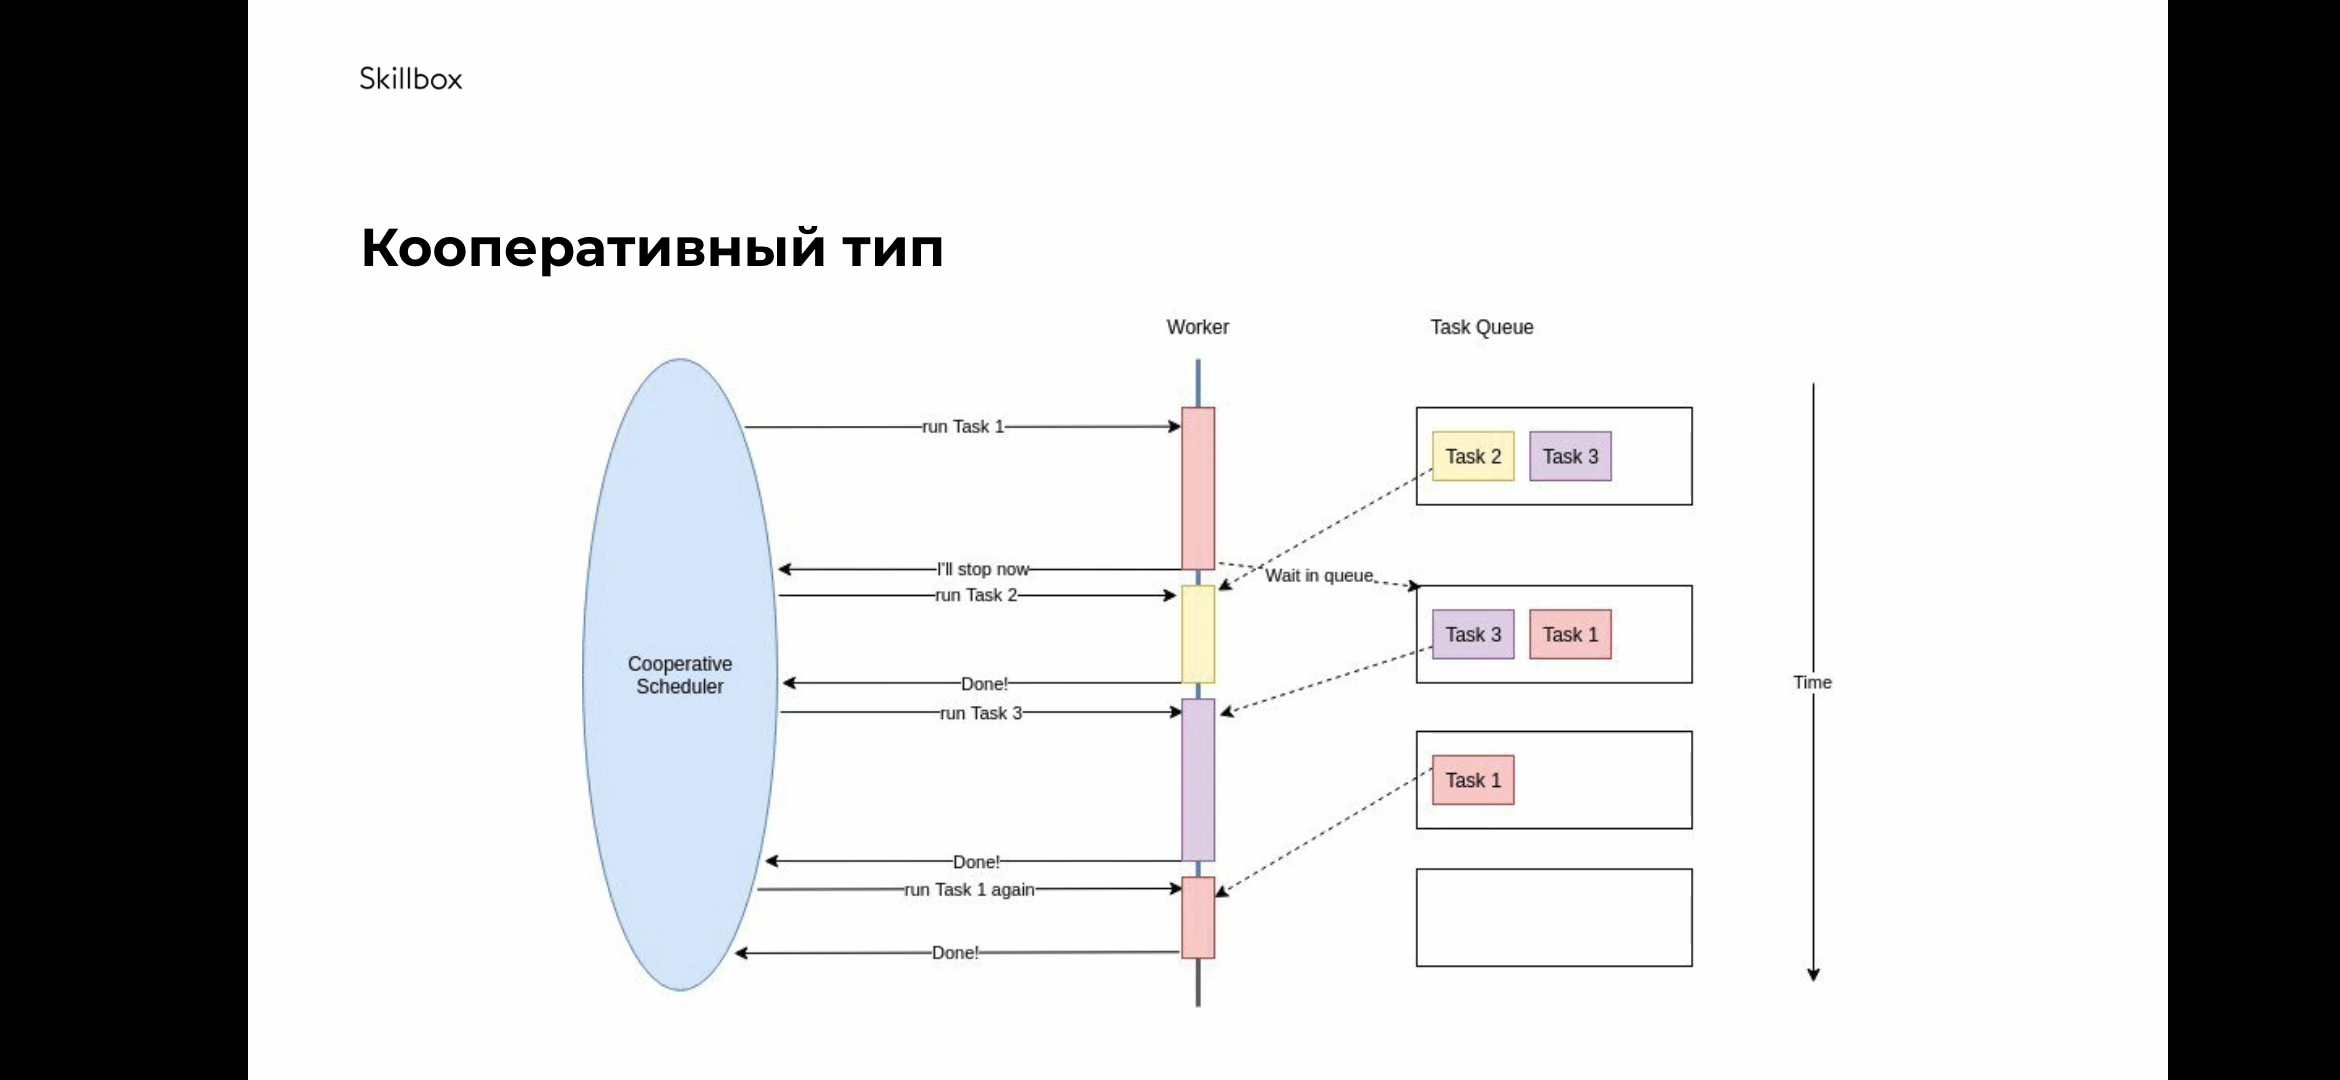
- Задача сама управляет своим состоянием
- Планировщик только назначает задачу на исполнение какому-то worker'у, а задача сама решает, когда она завершиться и вернет управление планировщику.

Если нет свободных worker'ов, то планировщик будет ждать, пока не появится свободный worker.

**ГЛАВНЫЙ МИНУС:** что worker может не вернуть управление планировщику, если задача не завершилась, т.к. она может быть очень объемной и занимать много времени на исполнение.

*2) Вытесняющий тип/ Преоритетная многозадачность*

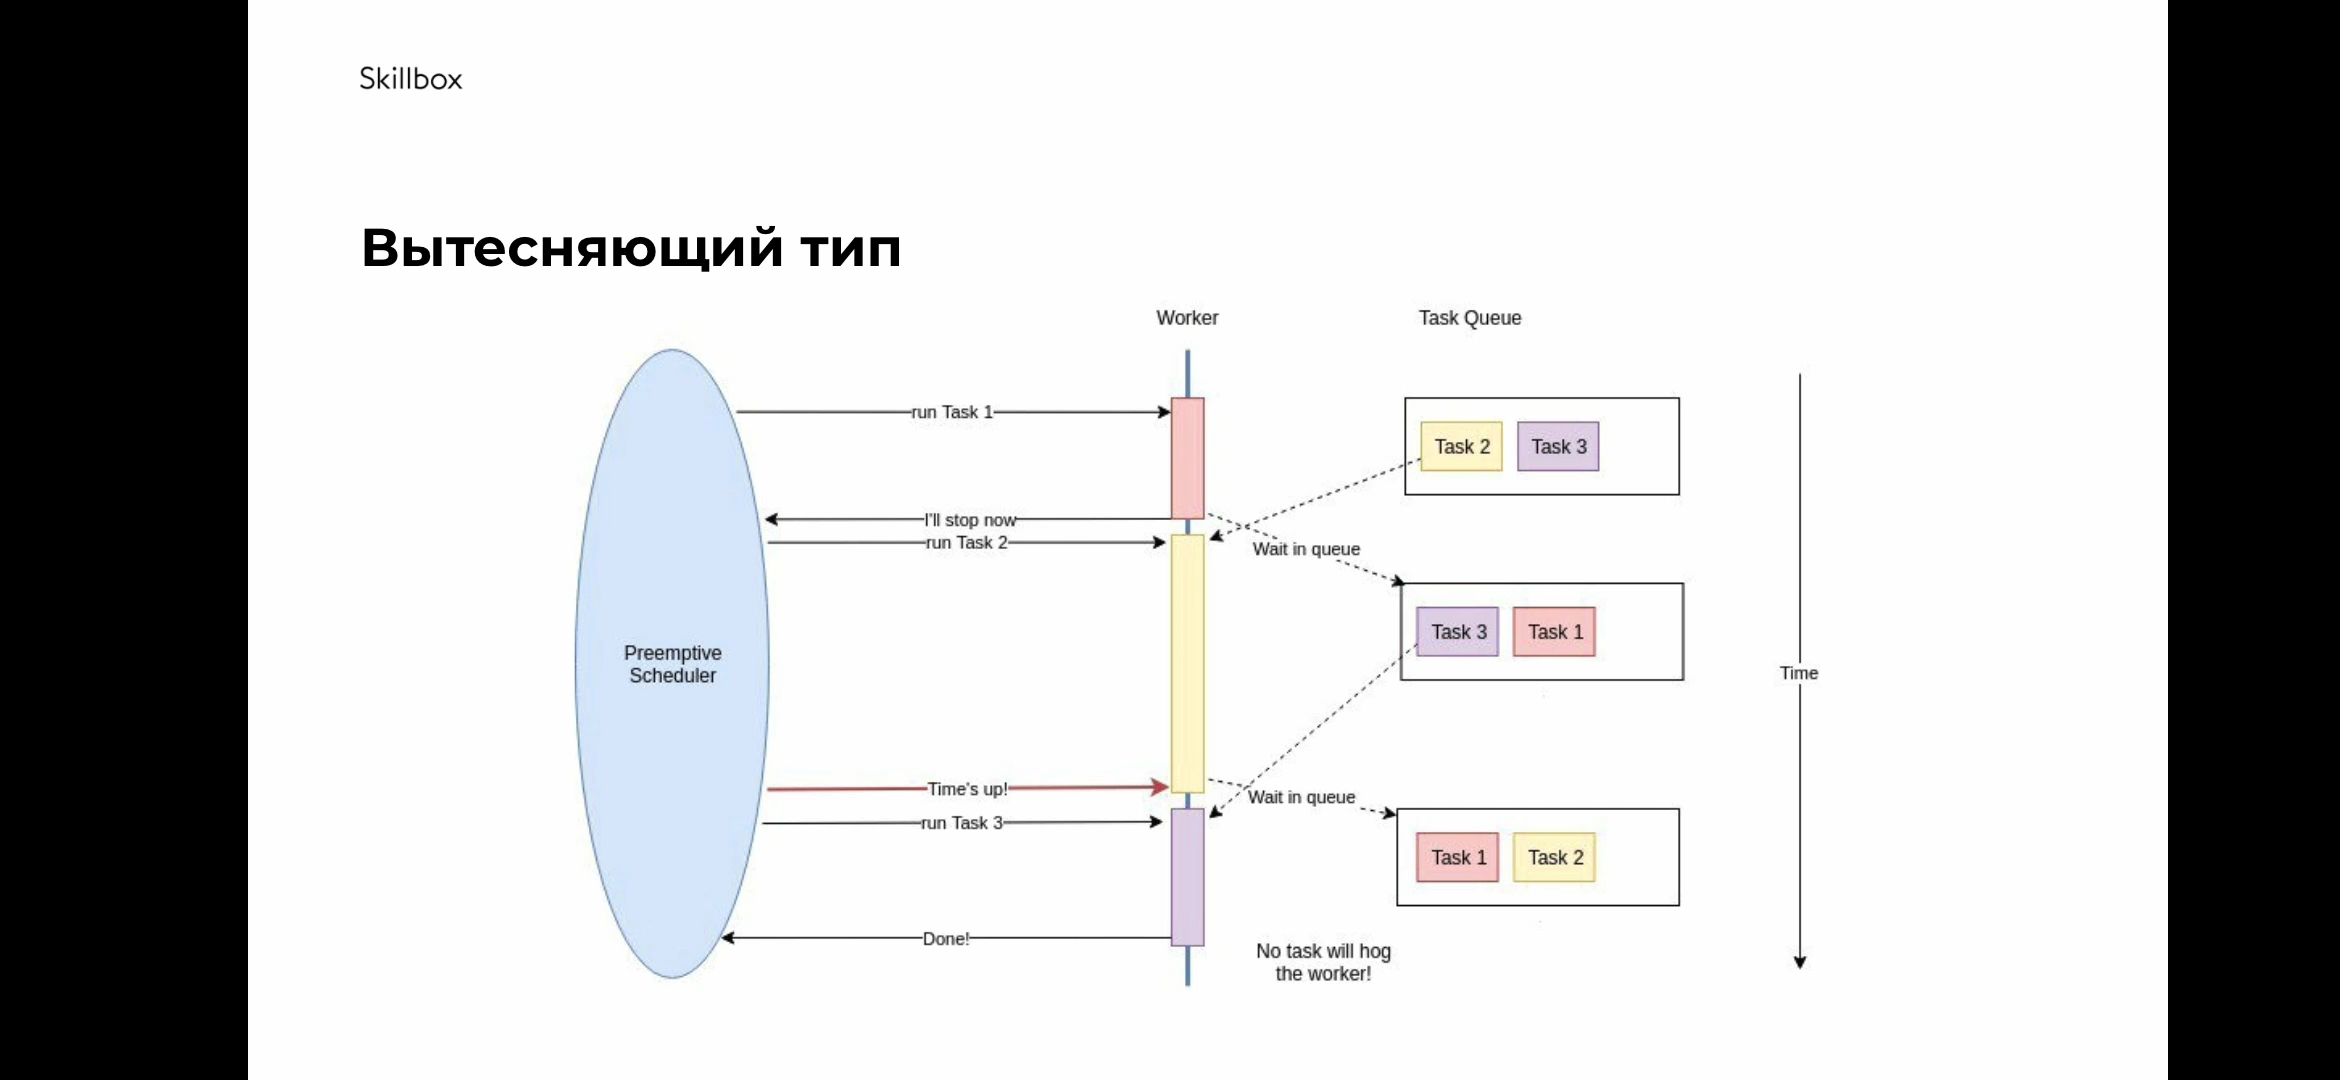
- Планировщик сам управляет состоянием задачи.
- Планировщик назначает задачу на исполнение и сам решает, когда задача должна завершиться и вернет управление планировщику.
Если нет свободных worker'ов, то планировщик будет ждать, пока не появится свободный worker.
- Если задача не завершилась, то планировщик может прервать её выполнение и назначить другую задачу на исполнение.
- Приэтом у каждой задачи есть приоритет, и планировщик может назначить задачу с более высоким приоритетом на исполнение, даже если другие задачи ещё не завершились.

**ГЛАВНЫЙ МИНУС:** что для железа нужно сохранять состояние задачи, чтобы потом продолжить её выполнение. Это может занимать много памяти и времени на исполнение, т.к. переклчючение всяких регистров и т.д. занимает время.

## Примитивы синхронизации потоков и процессов

### > `Lock` из `threading`
- Используется для синхронизации потоков и предотвращения гонок данных. (Гонки данных возникают, когда несколько потоков пытаются одновременно изменить одни и те же данные.)
- Нужен, чтобы просто закрыть доступ к ресурсу, чтобы только один поток мог его использовать в данный момент времени.


**Основные методы и атрибуты класса `Lock`:**
- `acquire(timeout=None)` - захватывает блокировку, если она свободна. Если блокировка уже захвачена, то поток будет ждать, пока она не освободится или истечет время ожидания.
- `release()` - освобождает блокировку, позволяя другим потокам захватить её.
- `locked()` - возвращает `True`, если блокировка захвачена, иначе `False`.

> Можно использовать `with` для автоматического захвата и освобождения блокировки. (acquire и release)

### > `Semaphore` из `threading`
- Используется если нужно давать доступ к ресурсу НЕСКОЛЬКИМ потокам в данный момент времени:
- Внутри semaphore есть счетчик, который показывает, сколько потоков могут одновременно использовать ресурс.

**Основные методы и атрибуты класса `Semaphore`:**
- `acquire(timeout=None)` - захватывает семафор, если счетчик больше 0. Если счетчик равен 0, то поток будет ждать, пока не освободится семафор или истечет время ожидания.
- `release()` - освобождает семафор, увеличивая счетчик на 1.
- `value()` - возвращает текущее значение счетчика семафора.
- `locked()` - возвращает `True`, если семафор захвачен, иначе `False`.

> Можно использовать `with` для автоматического захвата и освобождения семафора. (acquire и release)

## DEADLOCK
- Ситуация, когда два или более потоков блокируют друг друга, ожидая освобождения ресурсов, которые уже захвачены другими потоками.
- Например, поток A захватывает ресурс 1 и ожидает ресурс 2, а поток B захватывает ресурс 2 и ожидает ресурс 1. В результате оба потока блокируются и не могут продолжить выполнение.
### Как избежать DEADLOCK:
1. **Избегать циклических зависимостей**: Не допускать ситуации, когда потоки ожидают друг друга в цикле.
2. **Использовать таймауты**: Устанавливать таймауты при захвате блокировок, чтобы потоки не блокировались навсегда.
3. **Использовать `try` и `finally`**: Обеспечить освобождение блокировок в случае возникновения исключений, чтобы избежать зависания потоков.

## Задача 1: Просто реализовать все, что было в этом уроке, и сделать так, чтобы все работало.

In [18]:
from bs4 import BeautifulSoup
import json
import os


os.chdir("/home/ranil/Рабочий стол/Project")
PATH = "LearnParsing/data/hw2/"
path_files = None

with open(PATH + "files.txt", "r") as f:
    path_files= f.readlines()
    path_files= ["LearnParsing/" + el[:-1] for el in path_files]


data_json = []

def search(path_file):
    global data_json

    with open(path_file) as f:
        html_code = f.read()

    soup = BeautifulSoup(markup= html_code,
                features= 'lxml')
    data = soup.find('div', id= "him_bx").find_all('span', class_ = "him_bx__legend pr__fl")
    
    d_json = dict()
    for el in data: 
        key = el.text.split()[0].capitalize()
        value = float(el.text.split()[2].replace(',', '.'))
        d_json[key] = value
    
    data_json.append(d_json)

In [35]:
from time import time

start = time()
for f in path_files:
    search(f)
    
print(data_json)
end = time()
print(f"TIME = {end - start}")

[{'Жиры': 0.39, 'Белки': 1.4, 'Углеводы': 11.12, 'Вода': 86.35, 'Зола': 0.75}, {'Жиры': 0.11, 'Белки': 0.64, 'Углеводы': 21.31, 'Вода': 77.56, 'Зола': 0.38}, {'Жиры': 0.1, 'Белки': 0.4, 'Углеводы': 15.3, 'Вода': 83.8, 'Зола': 0.4}, {'Жиры': 0.39, 'Белки': 1.4, 'Углеводы': 11.12, 'Вода': 86.35, 'Зола': 0.75}, {'Жиры': 0.11, 'Белки': 0.64, 'Углеводы': 21.31, 'Вода': 77.56, 'Зола': 0.38}, {'Жиры': 0.1, 'Белки': 0.4, 'Углеводы': 15.3, 'Вода': 83.8, 'Зола': 0.4}, {'Жиры': 0.39, 'Белки': 1.4, 'Углеводы': 11.12, 'Вода': 86.35, 'Зола': 0.75}, {'Жиры': 0.11, 'Белки': 0.64, 'Углеводы': 21.31, 'Вода': 77.56, 'Зола': 0.38}, {'Жиры': 0.1, 'Белки': 0.4, 'Углеводы': 15.3, 'Вода': 83.8, 'Зола': 0.4}, {'Жиры': 0.39, 'Белки': 1.4, 'Углеводы': 11.12, 'Вода': 86.35, 'Зола': 0.75}, {'Жиры': 0.11, 'Белки': 0.64, 'Углеводы': 21.31, 'Вода': 77.56, 'Зола': 0.38}, {'Жиры': 0.1, 'Белки': 0.4, 'Углеводы': 15.3, 'Вода': 83.8, 'Зола': 0.4}, {'Жиры': 0.39, 'Белки': 1.4, 'Углеводы': 11.12, 'Вода': 86.35, 'Зола': 0.75

In [42]:
from threading import Thread

threads = []

start = time()
for f in path_files:
    t = Thread(target= search, args=(f)) 
    threads.append(t)
    t.start()

for t in threads:
    t.join()
end = time()

print(end - start)

Exception in thread Thread-242 (search):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-243 (search):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-244 (search):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/ranil/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    self.run()
  File "/home/ranil/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/usr/lib/python3.10/threading.py", line 953, in run
    _threading_Thread_run(self)
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
TypeError: search() takes 1 positional argument but 54 were given
    self._targ

0.00828409194946289


In [41]:
from multiprocessing import Process

processes = []

start = time()
for f in path_files:
    p = Process(target= search, args=(f))
    processes.append(p)
    p.start()

for p in processes:
    p.join()
end = time()

print(f"TIME = {end - start}")

Process Process-13:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process Process-14:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
TypeError: search() takes 1 positional argument but 43 were given
Traceback (most recent call last):
Process Process-15:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
TypeError: search() takes 1 positional argument but 54 were given
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
TypeError: search() takes 1 positional argument but 40 

TIME = 0.025468826293945312


In [ ]:
# Гонка данных

counter = 0

def func_th1():
    global counter
    while counter != 1000:
        counter += 1
        print(counter)
        time.sleep(0.001)

def func_th2():
    global counter
    while counter != -1000:
        counter -= 1
        print(counter)
        time.sleep(0.001)


t1 = Thread(target= func_th1)
t2 = Thread(target= func_th2)

t1.start()
t2.start()

t1.join()
t2.join()

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0


KeyboardInterrupt: 

-8-9

-10-9



-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-8
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-9
-10
-

Exception in thread Exception in threading.excepthook:
Exception ignored in thread started by: <bound method Thread._bootstrap of <Thread(Thread-441 (func_th1), stopped 135901726377664)>>
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 973, in _bootstrap


-1-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-17
-18
-19
-20
-21
-22
-23
-24
-25
-26
-27
-28
-29
-30
-31
-32
-33
-34
-35
-36
-37
-38
-39
-40
-41
-42
-43
-44
-45
-46
-47
-48
-49
-50
-51
-52
-53
-54
-55
-56
-57
-58
-59
-60
-61
-62
-63
-64
-65
-66
-67
-68
-69
-70
-71
-72
-73
-74
-75
-76
-77
-78
-79
-80
-81
-82
-83
-84
-85
-86
-87
-88
-89
-90
-91
-92
-93
-94
-95
-96
-97
-98
-99
-100
-101
-102
-103


      File "/usr/lib/python3.10/threading.py", line 1018, in _bootstrap_inner
    self._invoke_excepthook(self)
  File "/usr/lib/python3.10/threading.py", line 1336, in invoke_excepthook
    local_print("Exception in threading.excepthook:",
  File "/home/ranil/.local/lib/python3.10/site-packages/ipykernel/iostream.py", line 604, in flush
    self.pub_thread.schedule(self._flush)
  File "/home/ranil/.local/lib/python3.10/site-packages/ipykernel/iostream.py", line 267, in schedule
    self._event_pipe.send(b"")
  File "/home/ranil/.local/lib/python3.10/site-packages/zmq/sugar/socket.py", line 698, in send
    return super().send(data, flags=flags, copy=copy, track=track)
  File "zmq/backend/cython/_zmq.py", line 1137, in zmq.backend.cython._zmq.Socket.send
  File "zmq/backend/cython/_zmq.py", line 1179, in zmq.backend.cython._zmq.Socket.send
  File "zmq/backend/cython/_zmq.py", line 1324, in zmq.backend.cython._zmq._check_closed
zmq.error.ZMQError: Socket operation on non-socket
Exceptio

-104
-105
-106
-107
-108
-109
-110
-111
-112
-113
-114
-115
-116
-117
-118
-119
-120
-121
-122
-123
-124
-125
-126
-127
-128
-129
-130
-131
-132
-133
-134
-135
-136
-137
-138
-139
-140
-141
-142
-143
-144
-145
-146
-147
-148
-149
-150
-151
-152
-153
-154
-155
-156
-157
-158
-159
-160
-161
-162
-163
-164
-165
-166
-167
-168
-169
-170
-171
-172
-173
-174
-175
-176
-177
-178
-179
-180
-181
-182
-183
-184
-185
-186
-187
-188
-189
-190
-191
-192
-193
-194
-195
-196
-197
-198
-199
-200
-201
-202
-203
-204
-205
-206
-207
-208
-209
-210
-211
-212
-213
-214
-215
-216
-217
-218
-219
-220
-221
-222
-223
-224
-225
-226
-227
-228
-229
-230
-231
-232
-233
-234
-235
-236
-237
-238
-239
-240
-241
-242
-243
-244
-245
-246
-247
-248
-249
-250
-251
-252
-253
-254
-255
-256
-257
-258
-259
-260
-261
-262
-263
-264
-265
-266
-267
-268
-269
-270
-271
-272
-273
-274
-275
-276
-277
-278
-279
-280
-281
-282
-283
-284
-285
-286
-287
-288
-289
-290
-291
-292
-293
-294
-295
-296
-297
-298
-299
-300
-301
-302
-303


In [ ]:
from threading import Lock

lock1 = Lock()
counter = 0

def increment(id):
    global counter
    lock1.acquire()
    print(f"{id} = {lock1.locked()}")
    if id % 2 == 1:
        while counter != 1000:
            counter += 1
            print(counter)
            time.sleep(0.001)
    
    else:
        while counter != -1000:
            counter -= 1
            print(counter)
            time.sleep(0.001)
    lock1.release()
    # или 
    # with lock1:
    #     counter += 1

threads = []

for _ in range(3):
    t = Thread(target= increment, args=(_,))
    threads.append(t)
    t.start()

for t in threads:
    t.join()
    

0 = True
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-17
-18
-19
-20
-21
-22
-23
-24
-25
-26
-27
-28
-29
-30
-31
-32
-33
-34
-35
-36
-37
-38
-39
-40
-41
-42
-43
-44
-45
-46
-47
-48
-49
-50
-51
-52
-53
-54
-55
-56
-57
-58
-59
-60
-61
-62
-63
-64
-65
-66
-67
-68
-69
-70
-71
-72
-73
-74
-75
-76
-77
-78
-79
-80
-81
-82
-83
-84
-85
-86
-87
-88
-89
-90
-91
-92
-93
-94
-95
-96
-97
-98
-99
-100
-101
-102
-103
-104
-105
-106
-107
-108
-109
-110
-111
-112
-113
-114
-115
-116
-117
-118
-119
-120
-121
-122
-123
-124
-125
-126
-127
-128
-129
-130
-131
-132
-133
-134
-135
-136
-137
-138
-139
-140
-141
-142
-143
-144
-145
-146
-147
-148
-149
-150
-151
-152
-153
-154
-155
-156
-157
-158
-159
-160
-161
-162
-163
-164
-165
-166
-167
-168
-169
-170
-171
-172
-173
-174
-175
-176
-177
-178
-179
-180
-181
-182
-183
-184
-185
-186
-187
-188
-189
-190
-191
-192
-193
-194
-195
-196
-197
-198
-199
-200
-201
-202
-203
-204
-205
-206
-207
-208
-209
-210
-211
-212
-213
-214
-215
-216
-217
-218
-219
-220

In [ ]:
from threading import Semaphore

lock1 = Semaphore(2)
counter = 0

def increment(id):
    global counter
    lock1.acquire()
    if id % 2 == 1:
        while counter != 1000:
            counter += 1
            print(counter)
            time.sleep(0.001)
    
    else:
        while counter != -1000:
            counter -= 1
            print(counter)
            time.sleep(0.001)
    lock1.release()
    # или 
    # with lock1:
    #     counter += 1

threads = []

for _ in range(3):
    t = Thread(target= increment, args=(_,))
    threads.append(t)
    t.start()

for t in threads:
    t.join()
    

-10

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
1
0
1
0
1
0
1
0
1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1
0
-1


KeyboardInterrupt: 

52
53
52
53


52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
53
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
51
52
5

Exception in thread Exception in threading.excepthook:
Exception ignored in thread started by: <bound method Thread._bootstrap of <Thread(Thread-656 (increment), stopped 135901715891904)>>
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 973, in _bootstrap
    self._bootstrap_inner()
  File "/usr/lib/python3.10/threading.py", line 1018, in _bootstrap_inner
    self._invoke_excepthook(self)
  File "/usr/lib/python3.10/threading.py", line 1336, in invoke_excepthook
    local_print("Exception in threading.excepthook:",
  File "/home/ranil/.local/lib/python3.10/site-packages/ipykernel/iostream.py", line 604, in flush
    self.pub_thread.schedule(self._flush)
  File "/home/ranil/.local/lib/python3.10/site-packages/ipykernel/iostream.py", line 267, in schedule
    self._event_pipe.send(b"")
  File "/home/ranil/.local/lib/python3.10/site-packages/zmq/sugar/socket.py", line 698, in send
    return super().send(data, flags=flags, copy=copy, track=track)
  File 

68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325


# Занятие 2. Мультипоточность. Часть 2

GIL - это вещь, которая смотрит на количество ссылок в нашем оъекте и если он равен 0, то удаляет этот объект. И следовательно, в Python возникают моменты когда нужно польше потоков, чем 1, но это ведет к тому, что GIL будет работать не корректно, поэтому придумали другие объодные пути:

**GIL (Global Interpreter Lock)** — это глобальная блокировка интерпретатора Python, которая не позволяет одновременно выполнять байткод Python более чем одному потоку в одном процессе.  
GIL нужен для безопасности работы с памятью (например, чтобы не было одновременного изменения объектов разными потоками).

**GIL не занимается подсчётом ссылок и удалением объектов** — этим занимается сборщик мусора Python (в том числе подсчёт ссылок).  
GIL просто не даёт двум потокам одновременно выполнять Python-код.

**Правильнее так:**

> GIL — это механизм в интерпретаторе CPython, который не позволяет нескольким потокам одновременно выполнять Python-код. Поэтому многопоточность в Python не ускоряет вычисления на нескольких ядрах процессора. Для обхода этого ограничения используют multiprocessing или сторонние решения.

**Кратко:**
- GIL — не про удаление объектов, а про синхронизацию исполнения Python-кода.
- Подсчёт ссылок — часть сборщика мусора, а не GIL.
- GIL мешает параллельным вычислениям в потоках, но не мешает многопроцессности.

Подробнее смотри в ячейке с пояснением GIL и в официальной документации Python.



## `POOL` из multiprocessng-а
- [Документация](https://docs-python.ru/standart-library/paket-multiprocessing-python/klass-pool-modulja-multiprocessing/)
### Конструктор `Pool()`

Создает пул рабочих процессов.

| Аргумент | Описание |
| :--- | :--- |
| `processes=None` | Количество рабочих процессов. Если `None`, используется `os.cpu_count()` (число ядер). |
| `initializer=None` | Функция, которая вызывается при запуске каждого рабочего процесса. |
| `initargs=()` | Кортеж аргументов для функции `initializer`. |

---

### Основные методы `Pool`

- Как использовать? Нужно просто вызвать ``Pool().map([функция], [аргументы])`` И тогда Pool сам распрделить ресурсы...


| Метод | Описание | Блокировка | Возвращает |
| :--- | :--- | :--- | :--- |
| **`apply()`** | Выполняет **одну** функцию в одном из процессов. | **Да**, ждет завершения. | Результат функции. |
| **`map()`** | Применяет функцию к **каждому** элементу последовательности. | **Да**, ждет завершения всех задач. | `list` с результатами. |
| **`apply_async()`** | Отправляет **одну** функцию на выполнение. Не ожидает конца переданного метода. Задаача попадает на случайного свободного worker-а | **Нет**, не ждет. | Объект `AsyncResult`. |
| **`map_async()`** | Отправляет на выполнение `map` для последовательности. Перед использованием почитай про `starmap_async()` (там больше, чем 1 аргумент можно задавать) | **Нет**, не ждет. | Объект `AsyncResult`. |
| **`close()`** | Запрещает добавление новых задач в пул. | Нет. | `None` |
| **`join()`** | Ожидает завершения всех задач, находящихся в пуле. | **Да**. | `None` |
| **`terminate()`** | Немедленно принудительно останавливает все рабочие процессы. | Нет. | `None` |

---

### Методы объекта `AsyncResult`

Этот объект возвращается неблокирующими методами (`apply_async`, `map_async`).

| Метод | Описание |
| :--- | :--- |
| **`get()`** | **Блокирует** выполнение и возвращает результат задачи, как только он будет готов. Лучше указать `timeout`, т.к. с переданным методом, может что-то случиться и тогда он будет в заблокированном состоянии|
| **`wait()`** | **Блокирует** выполнение, пока задача не будет завершена. Ничего не возвращает. |
| **`ready()`** | Проверяет, завершена ли задача. Возвращает `True` или `False`. Не блокирует. |
| **`successful()`** | Проверяет, завершилась ли задача без исключений. Вызывать после `ready() == True`. |
---
> POOL нужно успеть закрыть до выполнения метода join()


```Python 
with Pool(processing= cpu_count()) as pool:
```

> `cpu_count()` - возвращает число ядер, есть в `os.cpu_count()` и в `multiprocessing-е`

## Структуры данных для вхаимодействия ПРОЦЕССОВ (их синхронизация)

- в multiiprocess есть FIFO очередь. 
> В очередь кладется любой объект, который сериализуется модулем [pikle](https://docs-python.ru/standart-library/modul-pickle-python/brief-description/), который превращает объект в байт код и помещает в файл...

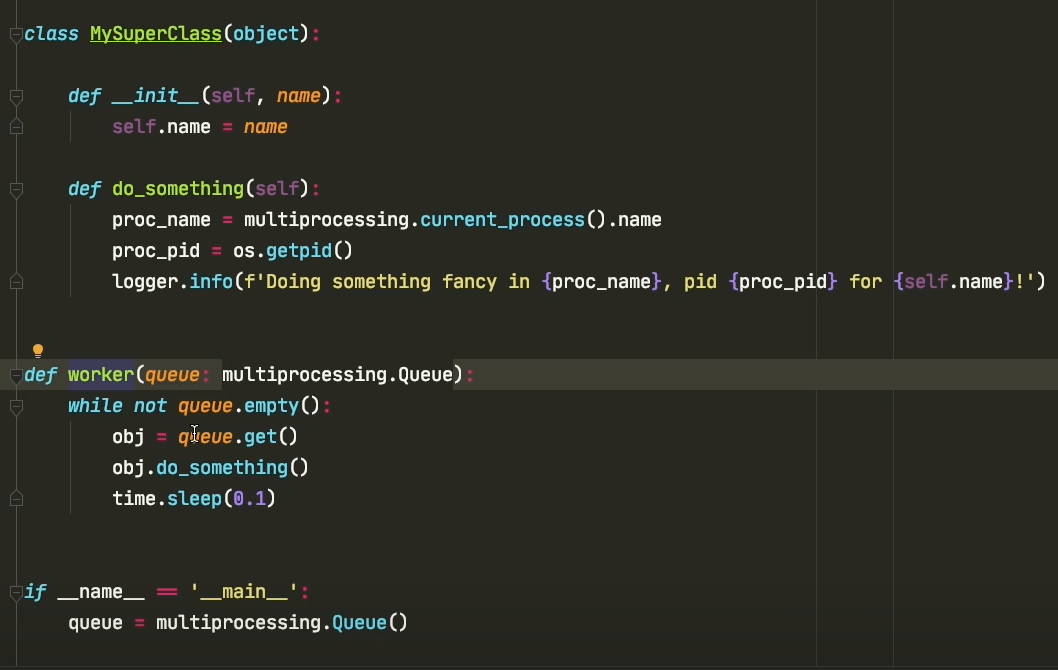

- > Методом  get() получаем содержимое очереди, но ВАЖНО понимать, что get() при получении None просто заснет на время, пока там что-то не появится...
- > Потом выполняем полезуную нагрузку do_something()

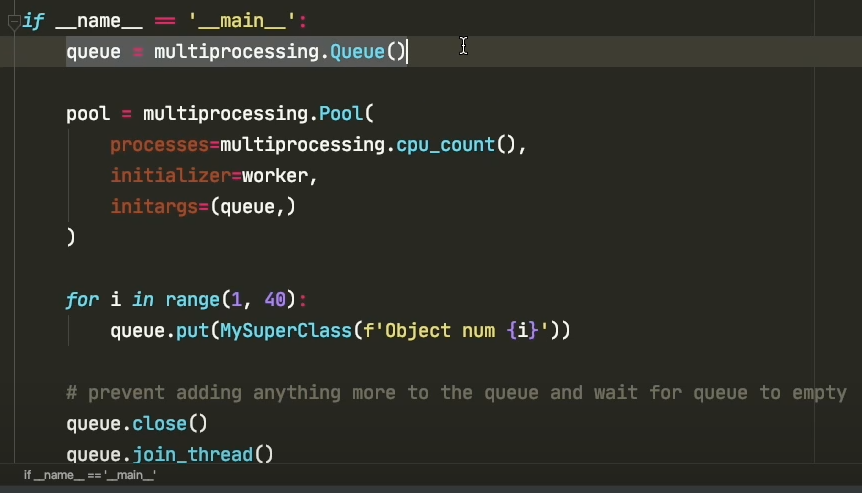

- >  C помощью аргумента initializer передаем функцию, которая будет выполняться при создании worker-а. А в аргумент initargs передаю аргументы этой функции

- > Дальше методом Put передаю в очередь наш класс и тем самым заполняю очередь

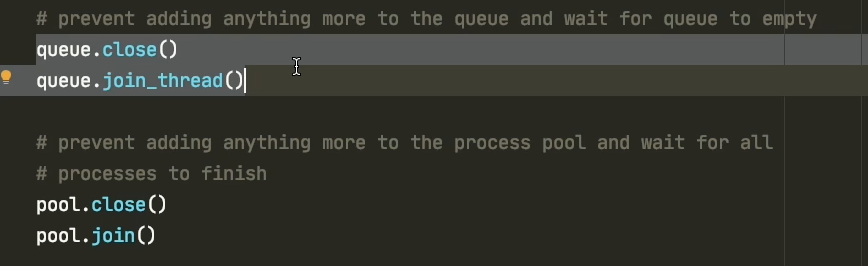

- > Дальше идет кооректное закрытие очереди и Pool-а

Внутри себя Queue использует вспомогательный поток, чтобы отправлять данные из открытого буфера в открытый Pipline с процессом

## Также в multiprocessing.pool есть `ThreadPool`

Он работает все также, как и Pool, но worker-ы это уже потоки

Вот как это работает и почему это так удобно:

1) Сериализация (или "упаковка"): Когда вы выполняете команду queue.put(MySuperClass('Object num 1')), Python не передает сам объект напрямую (ведь процессы имеют разную память). Вместо этого он "сериализует" (конвертирует) этот объект в поток байтов. Представьте, что он разбирает объект на детальки и записывает инструкцию, как его собрать обратно.

2) Передача по каналу: Этот поток байтов отправляется через специальный канал (pipe) от главного процесса к процессу-воркеру.

3) Десериализация ("распаковка"): Когда воркер выполняет команду obj = queue.get(), он получает этот поток байтов и, следуя "инструкции", воссоздает у себя в памяти точную копию исходного объекта MySuperClass.

Почему это так круто и зачем это нужно?

Потому что так мы передаем не просто "данные", а целую "задачу". Объект MySuperClass содержит в себе и данные (self.name = 'Object num 1'), и логику для их обработки (метод do_something()). Воркеру не нужно думать, что делать с полученными данными — он просто берет полученный объект и говорит ему: "Эй, объект, сделай свою работу!" (obj.do_something()). Это делает код гораздо чище и более организованным.

## Виды нагрузки:

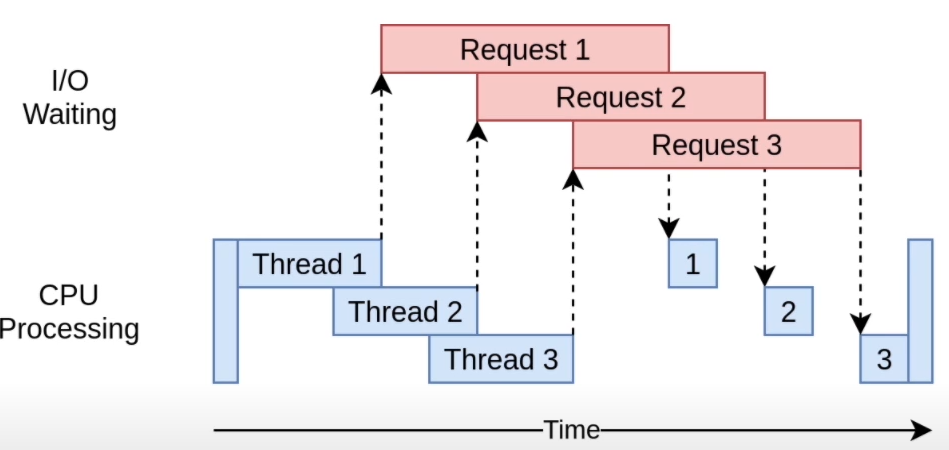

- CPU Processing - связаны нашим CPU
- I/O Witing - связаны ожиданием ответа от сети

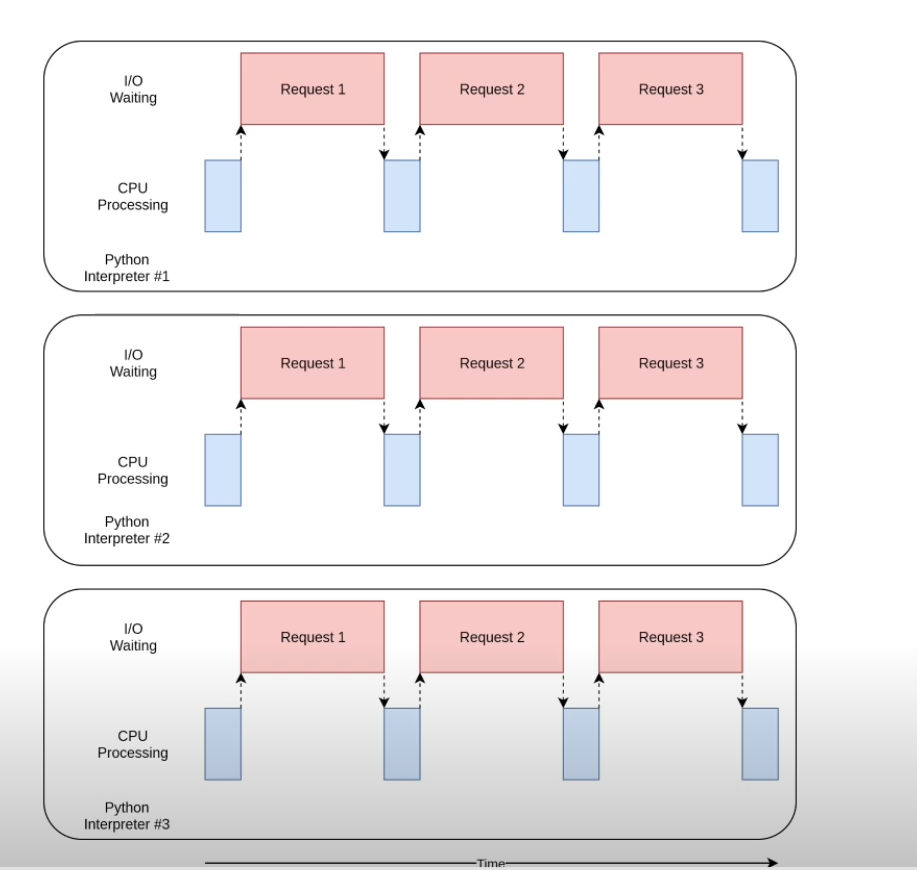

- В объектах Process или Pool мы вызываем несколько интерпретаторов

### Пример кода:

``` Python
# 1. Функция-работник (worker)
# Это задача, которую будет выполнять каждый процесс из пула.
# Она принимает один аргумент и должна возвращать результат.
def square_number(x):
    # Узнаем ID процесса, чтобы видеть, что работают разные процессы
    process_id = os.getpid()
    print(f"Процесс {process_id} начал вычислять квадрат числа {x}...")
    
    time.sleep(1)  # Имитируем сложную работу (1 секунда)
    
    result = x * x
    print(f"Процесс {process_id} закончил. Квадрат {x} = {result}")
    
    return result

# 2. Основной блок программы
# Важно использовать if __name__ == '__main__': для корректной работы multiprocessing
if __name__ == '__main__':
    
    # Данные, которые мы хотим обработать
    numbers_to_process = [1, 2, 3, 4, 5, 6, 7, 8]
    
    print("--- Запускаем обработку ---")
    start_time = time.time()

    # 3. Создание пула процессов
    # 'with' автоматически закроет пул после использования (pool.close() и pool.join())
    # Если не указать число, Pool() создаст процессы по числу ядер вашего процессора.
    with multiprocessing.Pool() as pool:
        
        # 4. Запуск задач
        # pool.map() - это главная команда. Она делает три вещи:
        #  а) Берет функцию (square_number).
        #  б) Берет список данных (numbers_to_process).
        #  в) "Раздает" по одному элементу из списка каждому свободному процессу в пуле.
        #  г) Ждет, пока ВСЕ задачи не будут выполнены, и собирает результаты в список.
        results = pool.map(square_number, numbers_to_process)
```